In [1]:
# Question 1: Basic Clustering with K-Means
# Description: Implement a simple K-Means clustering on a synthetic dataset.

Shape of the dataset (X): (300, 2)
First 5 data points:
[[-7.24711591 -7.55998509]
 [-7.56795788 -7.18775403]
 [-1.85116169  8.03761121]
 [ 4.46573387  2.85219117]
 [-8.51012682 -7.68657864]]

First 10 cluster labels:
[1 1 0 2 1 2 0 2 0 0]

Cluster centroids:
[[-2.60842567  9.03771305]
 [-6.88302287 -6.96320924]
 [ 4.72565847  2.00310936]]


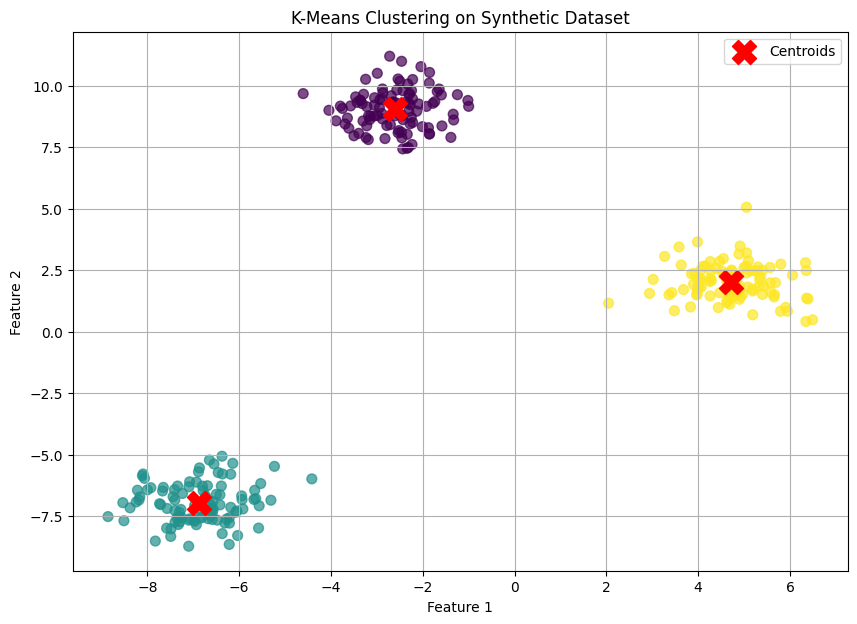


Inertia of the clustering: 362.7901127196245


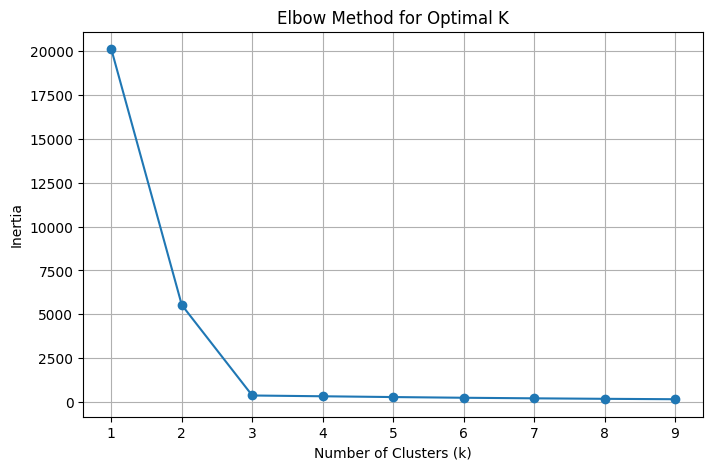

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate a synthetic dataset
# We'll create 3 distinct "blobs" of data points.
n_samples = 300
random_state = 42
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.8, random_state=random_state)

print(f"Shape of the dataset (X): {X.shape}")
print(f"First 5 data points:\n{X[:5]}")

# 2. Apply K-Means clustering
# We'll set n_clusters to 3, as we know there are 3 underlying clusters.
kmeans = KMeans(n_clusters=3, random_state=random_state, n_init=10)
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centroids = kmeans.cluster_centers_

print(f"\nFirst 10 cluster labels:\n{labels[:10]}")
print(f"\nCluster centroids:\n{centroids}")

# 3. Visualize the results
plt.figure(figsize=(10, 7))

# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering on Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Evaluate the clustering (e.g., using inertia)
# Inertia is the sum of squared distances of samples to their closest cluster center.
print(f"\nInertia of the clustering: {kmeans.inertia_}")

# To understand how inertia changes with k (the "elbow method")
# You can run K-Means for various k values and plot inertia to find the optimal k.
inertias = []
k_range = range(1, 10)
for k in k_range:
    kmeans_k = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    kmeans_k.fit(X)
    inertias.append(kmeans_k.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()